In [2]:
import requests

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

In [3]:
# Key: W19YTXIYGS3NRLE9

# part 1

# get data - free api key use is limited, so using a separate box to be safe
r = requests.get("https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=IBM&apikey=W19YTXIYGS3NRLE9")

In [4]:
j = r.json()

# make a dataframe and get the right rows
df = pd.DataFrame(j["Time Series (Daily)"]).T
df = df.loc["2024-03-26":"2023-11-07"]


# make test and train sets
test = df[:5]
train = df[6:]


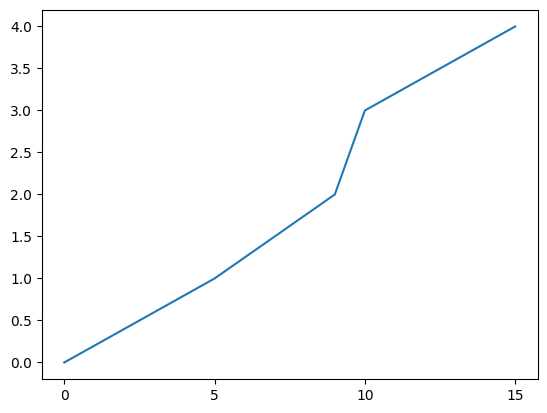

In [5]:
x = [0,5,9,10,15]
y = [0,1,2,3,4]
plt.plot(x,y)
plt.xticks(np.arange(min(x), max(x)+1, 5.0))
plt.show()

column names: 
['open', 'high', 'low', 'close', 'volume']


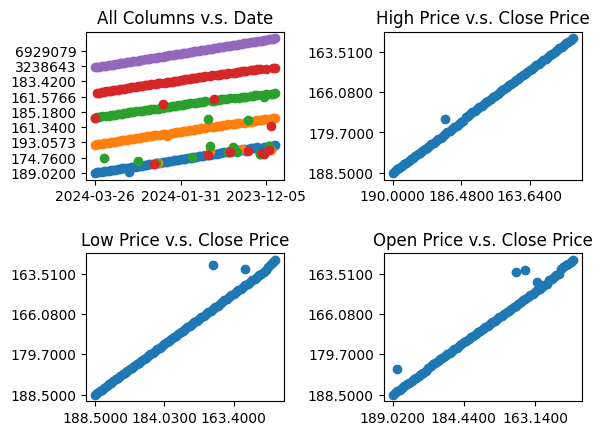

In [31]:
# part 2

# make plots
df = df.rename(columns={"1. open": "open", "2. high": "high", "3. low": "low", "4. close": "close", "5. volume": "volume"})
print("column names: ")
print(list(df.columns))

# Graph all columns
all_pts = plt.subplot(221)
for col in list(df.columns):
    all_pts.scatter(df.index, df[str(col)])
plt.xticks(np.arange(0, len(plt.xticks()[0])+1, 38.0))
plt.yticks(np.arange(0, len(plt.yticks()[0])+1, 42))
all_pts.set_title("All Columns v.s. Date")

# Graph high price to closing price
high_close = plt.subplot(222)
high_close.scatter(df['high'], df['close'])
high_close.set_title("High Price v.s. Close Price")
plt.xticks(np.arange(0, len(plt.xticks()[0])+1, 30.0))
plt.yticks(np.arange(0, len(plt.yticks()[0])+1, 24))

# Graph low price to closing price
low_close = plt.subplot(223)
low_close.scatter(df['low'], df['close'])
low_close.set_title("Low Price v.s. Close Price")
plt.xticks(np.arange(0, len(plt.xticks()[0])+1, 30.0))
plt.yticks(np.arange(0, len(plt.yticks()[0])+1, 24))

# Graph open price to closing price
open_close = plt.subplot(224)
open_close.scatter(df['open'], df['close'])
open_close.set_title("Open Price v.s. Close Price")
plt.xticks(np.arange(0, len(plt.xticks()[0])+1, 30.0))
plt.yticks(np.arange(0, len(plt.yticks()[0])+1, 24))

plt.subplots_adjust(hspace=0.5, wspace=0.5)

plt.show()



Q: Now that we’ve visualized our data, let's make a few conjectures about what to expect from our linear regression model. For each of the variable relationships you graphed above, which of them display a linear relationship? Which do not? Why or why not? 

A: Almost all of the graphs seem to exhibit some sort of linear relationship. This is possibly because low, high, and opening price are all metrics of the general price a stock is selling for in the window of time that trades are allowed to take place. Thus, the data seems to indicate that closing prices will vary proportionately with these metrics. When comparing against date, all metrics seem to have a positive linear relationship, possibly indicating a linear inflation rate.